# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [1]:
import numpy as np
from datascience import *
from IPython.display import YouTubeVideo

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Hypothesis Test Simulation: Comparing Distributions (Using TVD as a Test Statistic)

We are re-visitng the 'Swain v. Alabama' Supreme Court Case by investigating Jury representation a bit more locally. Consider the following study conducted by the American Civil Liberties Union of Northern California on [Jury representataion in Alameda County](https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf)

In [2]:
jury = Table().read_table('Jury_Alameda.csv')
jury

Ethnicity,Eligible,Panel
Asian / PI,0.15,0.26
Black / AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


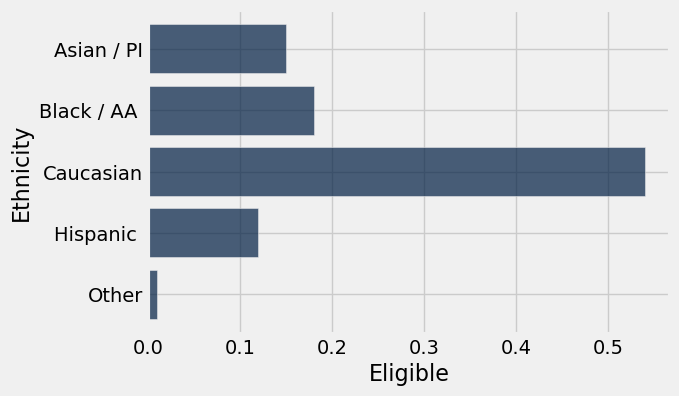

In [3]:
jury.barh('Ethnicity','Eligible')

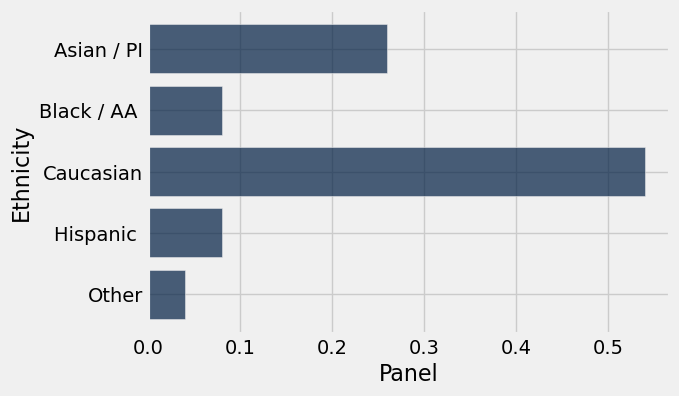

In [4]:
jury.barh('Ethnicity','Panel')

In [12]:
def total_variation_distance(distribution1, distribution2):
    return sum(abs(distribution1 - distribution2))/2

In [13]:
jury.column('Eligible')

array([ 0.15,  0.18,  0.54,  0.12,  0.01])

In [14]:
observed_tvd = total_variation_distance(jury.column('Panel'),jury.column('Eligible'))
observed_tvd

0.14000000000000001

In [22]:
one_sample = sample_proportions(500,jury.column('Eligible'))
one_sample

array([ 0.118,  0.188,  0.554,  0.136,  0.004])

In [23]:
#for one simulation
simulated_tvd = total_variation_distance(one_sample,jury.column('Eligible'))
simulated_tvd

0.03800000000000002

In [25]:
simulated_tvds = make_array()

for i in np.arange(10000):
    sim_jury = sample_proportions(500,jury.column('Eligible'))
    sim_tvd = total_variation_distance(sim_jury,jury.column('Eligible'))
    simulated_tvds = np.append(simulated_tvds,sim_tvd)

simulated_tvds

array([ 0.044,  0.022,  0.012, ...,  0.028,  0.012,  0.046])

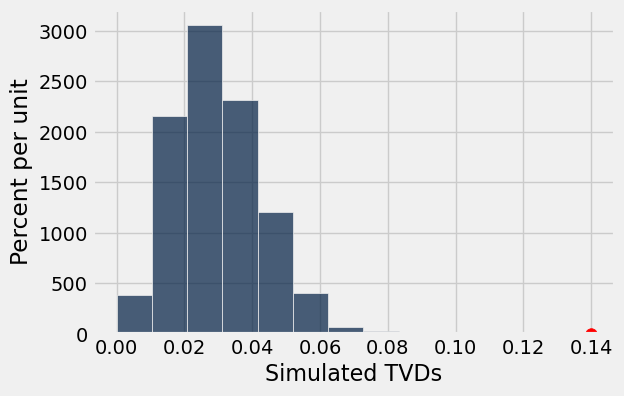

In [26]:
Table().with_column("Simulated TVDs", simulated_tvds).hist()
plt.scatter(observed_tvd, 0, color='red', s=70, zorder=2);
plt.show();

In [31]:
p_value_tvd = sum(simulated_tvds >= observed_tvd)/len(simulated_tvds)
p_value_tvd

0.0